# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")

In [ ]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"],axis=1)
y = df["Customer Lifetime Value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
clf = MLPRegressor()
MLPRegressor?

In [ ]:
params = {"hidden_layer_sizes":[(10,),(10,50,),(50,100,25,5,)],
          "activation":["relu","tanh","logistic"],
          "alpha":[0.001,0.01]}

In [ ]:
grid = GridSearchCV(clf,params,cv=5)
fit = grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
print("Best parameter:",grid.best_params_)
print("Best score:",grid.best_score_)

Best parameter: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 50)}
Best score: 0.07725811482188054


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
p_dict = {
    "hidden_layer_sizes": (10,50,), 
    "activation":"relu",
    "alpha":0.01
}

MLPRegressor(**p_dict)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(10, 50))

In [ ]:
fit=MLPRegressor(**p_dict).fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4.) What are the in-sample and out of sample MSEs

In [ ]:
in_y_predict=fit.predict(X_train)
out_y_predict=fit.predict(X_test)
in_MSE=np.sqrt(np.square(np.subtract(y_train,in_y_predict))).mean()
out_MSE=np.sqrt(np.square(np.subtract(y_test,out_y_predict))).mean()

In [ ]:
print("In-sample MSE:",in_MSE)
print("Out-sample MSE:",out_MSE)

In-sample MSE: 4240.744819745841
Out-sample MSE: 4205.502658554117


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# p_dict = {
#     "hidden_layer_sizes": (10,50,), 
#     "activation":"relu",
#     "alpha":0.01
# }

model = Sequential()
model.add(Dense(50,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(5,activation="relu"))

In [ ]:
model.compile(loss="mse",optimizer=Adam(lr=0.01))
model.fit(X_train,y_train,batch_size=32,epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 79540928.0000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 72749144.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 72724232.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 72449000.0000
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 72517512.0000
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 72374128.0000
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 72313160.0000
Epoch 8/100
200/200 [==============================] - 1s 5ms/step - loss: 72281504.0000
Epoch 9/100
200/200 [==============================] - 1s 5ms/step - loss: 72267536.0000
Epoch 10/100
200/200 [==============================] - 1s 5ms/step - loss: 72191520.0000
Epoch 11/100
200/200 [==============================] - 1s 4ms/step - loss: 72234848.0000
Epoch 12/100
200/20

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 5)                 130       
                                                                 
Total params: 8,605
Trainable params: 8,605
Non-trainable params: 0
_________________________________________________________________


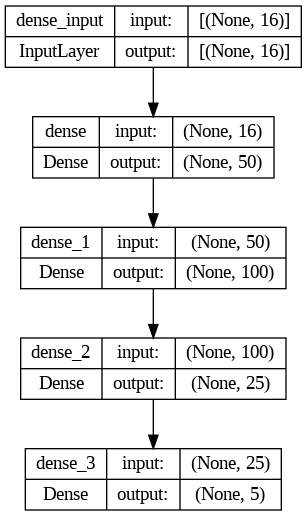

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ann_viz(model,title="CLV NN Viz",filename="NN_model.gz")
######## I don't know why no graph pops up. #########